## Importo las librerías y creo DataFrame


In [53]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
df = pd.read_csv("proyecto1/heart_failure_clinical_records_dataset.csv")
df.head()


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

## Para la exploración de los datos utilizo la librería pandas profile


In [55]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Reporte", explorative=True)
profile.to_file("reporte.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 109.83it/s]


## Grafico

Los pacientes con fracción de eyección mayor al promedio, que poseen presion arterial,son propensos a tener diabetes.


Text(0, 0.5, 'personas')

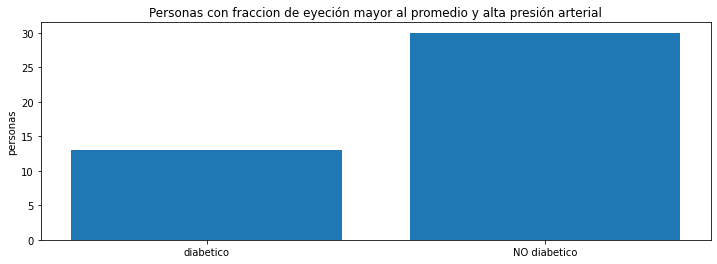

In [116]:
ej_fr_mean = df.ejection_fraction.mean()
# Separo el conjunto de datos que cumplen con la hipotesis
df_aux = df.loc[(df.ejection_fraction > ej_fr_mean) & (df.high_blood_pressure == 1)]

tot = len(df_aux)
tot_diabetes = len(df_aux[df_aux.diabetes == 1].count())
tot_no_diabetes = tot - tot_diabetes
tot_no_diabetes

plt.figure(figsize=(12, 4))
plt.bar(["diabetico", "NO diabetico"], [tot_diabetes, tot_no_diabetes])
plt.title("Personas con fraccion de eyeción mayor al promedio y alta presión arterial")
plt.ylabel("personas")


# Selecciono las features


Text(0.5, 0, 'Valor de k')

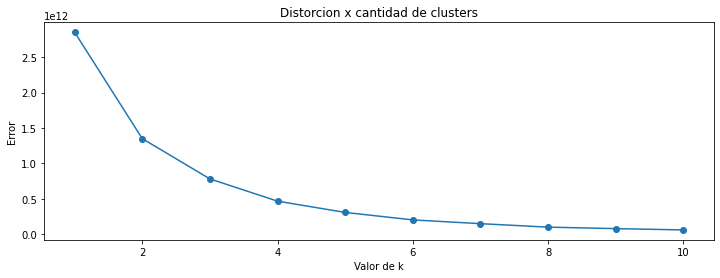

In [130]:
features = [
    "age",
    "anaemia",
    "creatinine_phosphokinase",
    "diabetes",
    "ejection_fraction",
    "high_blood_pressure",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "sex",
    "smoking",
    "time",
    "DEATH_EVENT",
]

features2 = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    distortion = kmeans.fit(df[features2]).inertia_
    distortions.append(distortion)

distortions

plt.figure(figsize=(12, 4))
plt.plot(K, distortions, marker="o")
plt.title("Distorcion x cantidad de clusters")
plt.ylabel("Error")
plt.xlabel("Valor de k")


In [131]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1)
labels = kmeans.fit_predict(df[features2])
labels

df["label"] = labels


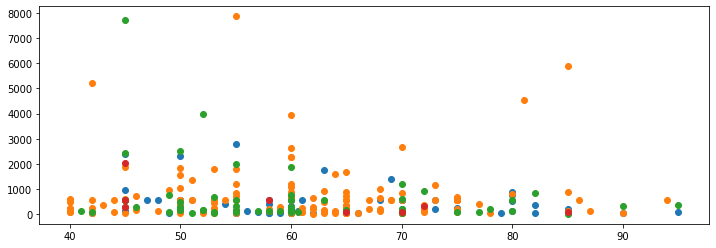

In [134]:
plt.figure(figsize=(12, 4))

for i in range(k):
    plt.scatter(
        df.loc[df.label == i].creatinine_phosphokinase,
    )

# for center in kmeans.cluster_centers_:
#     plt


/home/dario/.pyenv/versions/3.9.0/envs/core-changos/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/dario/.pyenv/versions/3.9.0/envs/core-changos/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 347.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

/tmp/ipykernel_6235/3266883734.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Run 1, iteration: 1/100, moves: 96, cost: 87.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 43, cost: 96.0
Run 2, iteration: 2/100, moves: 14, cost: 29.0
Run 2, iteration: 3/100, moves: 57, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 76, cost: 58.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 118, cost: 43.0
Run 4, iteration: 2/100, moves: 2, cost: 43.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 100.0
Best run was number 2


/tmp/ipykernel_6235/3266883734.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmodes['label'] = clusters


ejection_fraction  high_blood_pressure  diabetes  label
0                    0                    1         0      6
1                    0                    0         0      5
2                    0                    0         0      5
3                    0                    0         0      5
4                    0                    0         1      0
..                 ...                  ...       ...    ...
294                  0                    1         1      0
295                  0                    0         0      5
296                  1                    0         1      4
297                  0                    0         0      5
298                  1                    0         0      2

[299 rows x 4 columns]

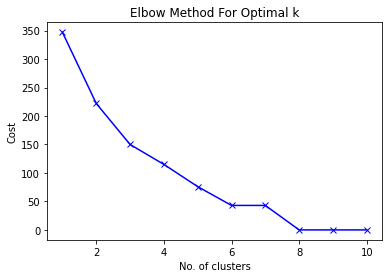

In [229]:
from kmodes.kmodes import KModes

columns = ["ejection_fraction", "high_blood_pressure", "diabetes"]
df_kmodes = df[columns]


df_kmodes.loc[df_kmodes["ejection_fraction"] > 38, "ejection_fraction"] = 1
df_kmodes.loc[(df_kmodes["ejection_fraction"] != 1), "ejection_fraction"] = 0

cost = []
for i in range(1,11):
    kmode = KModes(n_clusters=i, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_kmodes)
    cost.append(kmode.cost_)

plt.plot(range(1,11), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

kmode = KModes(n_clusters=7, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_kmodes)


df_kmodes['label'] = clusters
df_kmodes


299

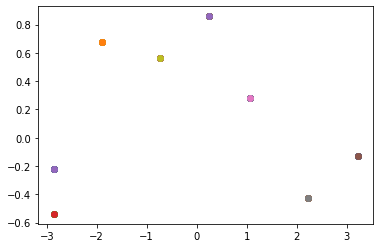

In [251]:
from sklearn import decomposition

columns = ["ejection_fraction", "high_blood_pressure", "diabetes"]
df_PCA = df_kmodes

pca = decomposition.PCA(n_components=2)
pca.fit(df_PCA)
df_PCA = pca.transform(df_PCA)

df_kmodes[df_kmodes['label'] == 0]
for i in df_PCA:
    plt.scatter(i[0], i[1])

len(df_PCA)

In [257]:
(df_kmodes[df_kmodes['label'] == 0])


ejection_fraction  high_blood_pressure  diabetes  label
4                    0                    0         1      0
21                   0                    1         1      0
24                   0                    1         1      0
25                   0                    0         1      0
29                   0                    0         1      0
..                 ...                  ...       ...    ...
279                  0                    0         1      0
288                  0                    0         1      0
292                  0                    0         1      0
293                  0                    0         1      0
294                  0                    1         1      0

[82 rows x 4 columns]